In [1]:
import pandas as pd

In [7]:
df_0 = pd.read_csv("Temp0.csv")
df_0_25 = pd.read_csv("Temp0-25.csv")
df_0_4 = pd.read_csv("Temp0-4.csv")
df_0_5 = pd.read_csv("Temp0-5.csv")
df_0_6 = pd.read_csv("Temp0-6.csv")
df_0_75 = pd.read_csv("Temp0-75.csv")
df_1 = pd.read_csv("Temp1.csv")

In [93]:
df_0["Temperature"] = 0
df_0 = df_0[["Test Case", "File Name", "Temperature", "Expected Output", "Actual Output", "Result"]]

In [95]:
df_0_25["Temperature"] = 0.25
df_0_25 = df_0_25[["Test Case", "File Name", "Temperature", "Expected Output", "Actual Output", "Result"]]

In [101]:
df_0_4["Temperature"] = 0.4
df_0_4 = df_0_4[["Test Case", "File Name", "Temperature", "Expected Output", "Actual Output", "Result"]]

In [103]:
df_0_5["Temperature"] = 0.5
df_0_5 = df_0_5[["Test Case", "File Name", "Temperature", "Expected Output", "Actual Output", "Result"]]

In [105]:
df_0_6["Temperature"] = 0.6
df_0_6 = df_0_6[["Test Case", "File Name", "Temperature", "Expected Output", "Actual Output", "Result"]]

In [107]:
df_0_75["Temperature"] = 0.75
df_0_75 = df_0_75[["Test Case", "File Name", "Temperature", "Expected Output", "Actual Output", "Result"]]

In [109]:
df_1["Temperature"] = 1
df_1 = df_1[["Test Case", "File Name", "Temperature", "Expected Output", "Actual Output", "Result"]]

In [163]:
df = pd.concat([df_0, df_0_25, df_0_4, df_0_5, df_0_6, df_0_75, df_1], ignore_index=True)

In [191]:
df = df.sort_values(by=["Test Case", "Temperature"], ascending=[True, True]).reset_index(drop=True)

In [208]:
# Create of all test cases
df.to_csv("TestCases.csv", index=False)

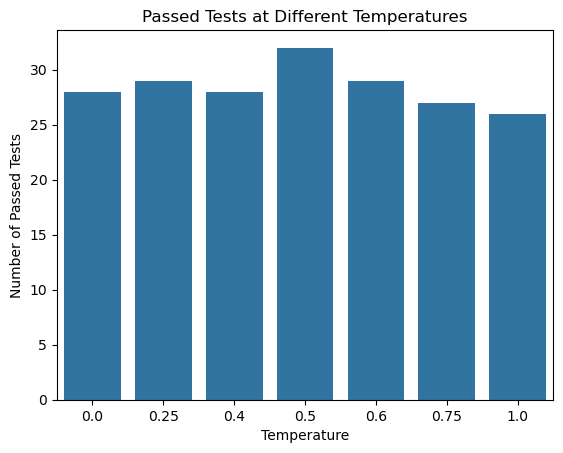

In [206]:
# Create bar chart that reveals the number of "Passed Tests at Different Temperatures"
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by temperature and counting PASSED results
passed_counts = df[df['Result'] == 'PASSED'].groupby('Temperature').size()

# Plotting
sns.barplot(x=passed_counts.index, y=passed_counts.values)
plt.xlabel('Temperature')
plt.ylabel('Number of Passed Tests')
plt.title('Passed Tests at Different Temperatures')
plt.show()

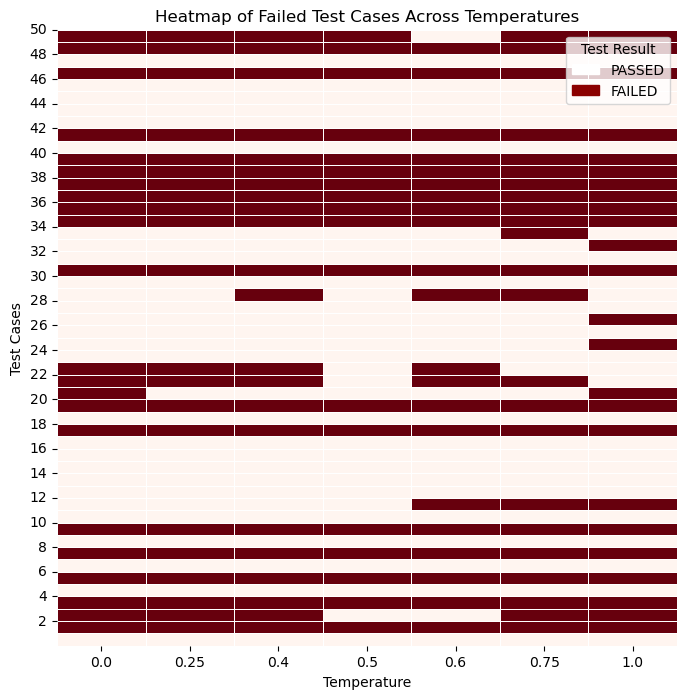

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Create a pivot table: index as test cases, columns as temperatures, values as test results
heatmap_data = df.pivot_table(index="Test Case", columns="Temperature", values="Result", aggfunc=lambda x: (x == "FAILED").sum())

# Plot heatmap
plt.figure(figsize=(8, 8))
ax = sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5, annot=False, cbar=False)

legend_patches = [mpatches.Patch(color="white", label="PASSED"),
                  mpatches.Patch(color="darkred", label="FAILED")]
plt.legend(handles=legend_patches, loc="upper right", title="Test Result")

plt.xlabel("Temperature")
plt.ylabel("Test Cases")
plt.title("Heatmap of Failed Test Cases Across Temperatures")
plt.xticks(rotation=0)

# Custom y-axis
even_ticks = [i for i in heatmap_data.index if i % 2 == 0]
ax.set_yticks(even_ticks)  # Set y-tick positions
ax.set_yticklabels(even_ticks, rotation=0)  # Ensure labels match the test cases
ax.invert_yaxis()

# Display the plot
plt.show()